 # ---------------Problem Definition-------------- ##
 
This notebook is prepared to analyze the feedback given by customers of a company and identify the key improvement areas. We analyze the sentiment of different demographics as well as measure the performance of different branch of retailer at different time dimension. 

# ------------- Exploratory  Data Analysis------------------ #

In [1]:
#Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

## Load the data ##

In [2]:
df_loaded=pd.read_excel("Bluemountain.xls")

In [3]:
df_loaded.describe(include='all')

,Id,Name,Href,_ExternalId,Receipt No,Customer No,Shop Date,Store,NPS Label,NPS Score,...,Gender,Price,Availability,Service,Information,Requested Callback,Time Of Day,Region,Division,Comment Tags
count,3212.000000,3212,0.0,3212.000000,3212.000000,3.212000e+03,3212,3212,3212,3212.000000,...,3212,3212,3212,3212,3212,3212,3212,3212,3212,2926
unique,NaN,3,NaN,NaN,NaN,NaN,11,261,3,NaN,...,2,3,3,3,3,2,11,4,4,1857
top,NaN,Neutral,NaN,NaN,NaN,NaN,2014-10-02T10:00:00,Chadstone,Neutral,NaN,...,Female,Worse,Worse,Worse,Worse,No,10am,Region 2,Apparel,Price
freq,NaN,1899,NaN,NaN,NaN,NaN,326,56,1899,NaN,...,1615,1859,1779,1855,1836,1613,326,818,827,46
mean,2100.769303,NaN,NaN,7768.525841,50549.420299,5.114535e+06,NaN,NaN,NaN,7.547634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1228.711205,NaN,NaN,4111.825070,28367.984870,2.913550e+06,NaN,NaN,NaN,1.221334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,3.000000,1010.000000,1.019760e+05,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1019.750000,NaN,NaN,4722.000000,25987.750000,2.568726e+06,NaN,NaN,NaN,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2081.500000,NaN,NaN,8012.000000,50039.500000,5.109123e+06,NaN,NaN,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3171.250000,NaN,NaN,11072.500000,74933.750000,7.639817e+06,NaN,NaN,NaN,8.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean and Prepare data for analysis ##

In [4]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           3212 non-null   int64  
 1   Name                         3212 non-null   object 
 2   Href                         0 non-null      float64
 3   _ExternalId                  3212 non-null   int64  
 4   Receipt No                   3212 non-null   int64  
 5   Customer No                  3212 non-null   int64  
 6   Shop Date                    3212 non-null   object 
 7   Store                        3212 non-null   object 
 8   NPS Label                    3212 non-null   object 
 9   NPS Score                    3212 non-null   int64  
 10  Likelihood To Shop Again     3212 non-null   int64  
 11  Customer Satisfaction Score  3212 non-null   int64  
 12  Category                     3212 non-null   object 
 13  Question          

In [5]:
# dropping unncessesary columns
df_cleaned=df_loaded.drop(columns=['Id','Href','_ExternalId','Receipt No','Customer No'])
#keeping column names more consistent
df_cleaned.columns=[ *map(lambda x: x.lower().replace(' ','_'),df_cleaned.columns)]
#removing dollar symbol from total_spend
df_cleaned.total_spend=df_cleaned.total_spend.str.replace('$','').astype(float)

In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         3212 non-null   object 
 1   shop_date                    3212 non-null   object 
 2   store                        3212 non-null   object 
 3   nps_label                    3212 non-null   object 
 4   nps_score                    3212 non-null   int64  
 5   likelihood_to_shop_again     3212 non-null   int64  
 6   customer_satisfaction_score  3212 non-null   int64  
 7   category                     3212 non-null   object 
 8   question                     3212 non-null   object 
 9   comment                      3208 non-null   object 
 10  total_spend                  3212 non-null   float64
 11  age                          3212 non-null   int64  
 12  age_group                    3212 non-null   object 
 13  gender            

In [7]:
#let's find out sentiment value from comment
sentiment_polarity=[]
for comment in df_cleaned.comment:
    x=TextBlob(str(comment))
    sentiment_polarity.append(round(x.polarity,1))

In [8]:
df_cleaned.insert(23, "sentiment_polarity", sentiment_polarity, True) 

In [9]:
print(df_cleaned.comment[10]+'\n\n'+ str(df_cleaned.sentiment_polarity[10]))

no particular reason. items wanted were in stock and 3 for 2 childrens clothing discount applied to similarly priced items rather than just the cheapest of all of them thankfully.

-0.0


## ------ Explore Demographic of Customers--------- ##

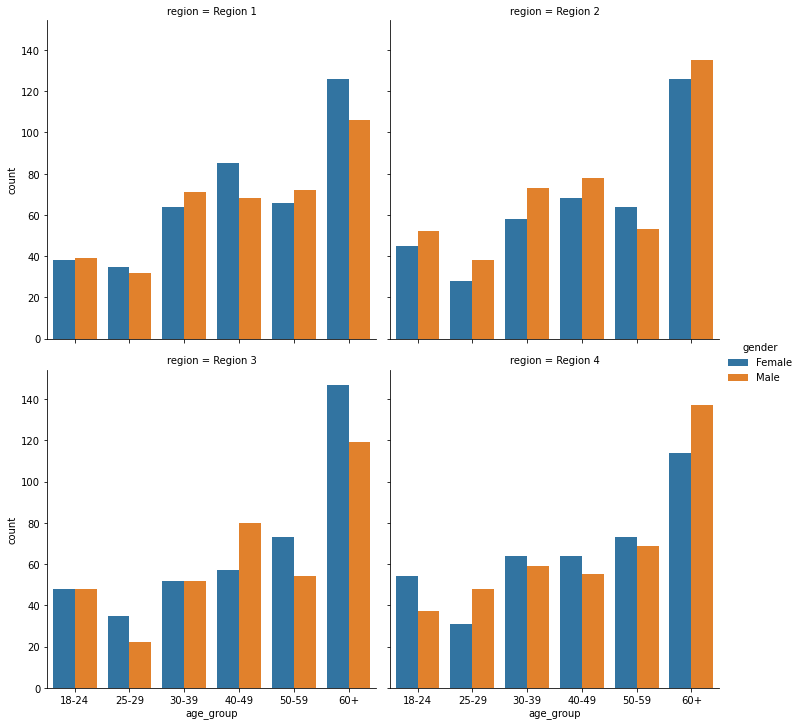

In [10]:
age_order=['18-24','25-29','30-39','40-49','50-59','60+']
region_order=['Region 1','Region 2','Region 3','Region 4']
sns.catplot(x='age_group',hue='gender',col='region',col_wrap=2,data=df_cleaned,order=age_order,kind='count',col_order=region_order)

### Relationship of customer sentiment polarity with customer satisfaction score ###

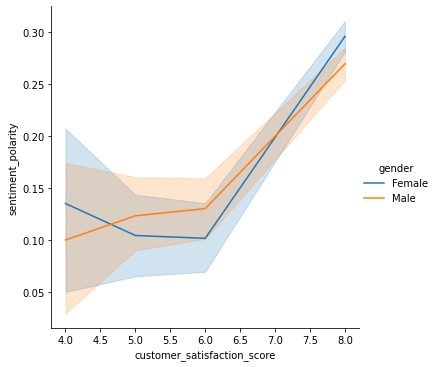

In [64]:
#sns.catplot(data=df_cleaned,x='time_of_day',y='sentiment_polarity',row='store',kind='box')
sns.relplot(x='customer_satisfaction_score',y='sentiment_polarity',hue='gender',data=df_cleaned,kind='line')

**We can see that increasing value of customer satisfaction score does not have much effect on sentiment polarity  before customer satisfaction score reaches to 6.But after satisfaction score of 6,increasing score value means more positive sentiment.**

### Worst Customer Experience (Where and Which category ?)

In [112]:
# total number of stores in feedback data

stores=len(df_cleaned['store'].value_counts())
store_list=df_cleaned['store'].value_counts()
print("total number of stores"+":"+str(stores))
store_list

total number of stores:261


Chadstone       56
Morley          45
Brisbane CBD    43
North Lakes     42
Edwardstown     41
                ..
Kempsey          1
Manjimup         1
Port Douglas     1
Lismore City     1
Katherine        1
Name: store, Length: 261, dtype: int64

In [93]:
worse_condition1=(df_cleaned['customer_satisfaction_score']<6)& (df_cleaned['likelihood_to_shop_again']<6)
worse_condition2=(df_cleaned['service']=='Worse')&(df_cleaned['availability']=='Worse')
category_condition=(df_cleaned['category']=='In-store Shopping Improvement Comments')|(df_cleaned['category']=='Satisfaction Comments')
df_worse_experience=df_cleaned[(worse_condition1 & worse_condition2)]
df_worse_store=df_cleaned[(worse_condition1 & worse_condition2)& category_condition]
worse_store=len(df_worse_store.store.value_counts())
print("Total number of worse stores"+":"+str(worse_store))
print("\nThe worse stores are:\n")
df_worse_store.store.unique()

Total number of worse stores:32

The worse stores are:



array(['Northland', 'Warrnambool', 'Liverpool', 'North Lakes',
       'Blacktown', 'Eastgardens', 'Maroochydore', 'Belconnen', 'Robina',
       'Roselands', 'Macarthur Square', 'Toowoomba', 'Bairnsdale',
       'Hollywood Plaza', 'Forest Hill', 'Gladstone', 'Dalby',
       'Hoppers Crossing', 'Earlville', 'Rhodes', 'Charlestown',
       'Watergardens', 'The Willows', 'Cannot find store', 'Hornsby',
       'Mareeba', 'Perth CBD', 'Fountain Gate', 'Victor Harbor',
       'Rouse Hill', 'Wonthaggi', 'Southport'], dtype=object)

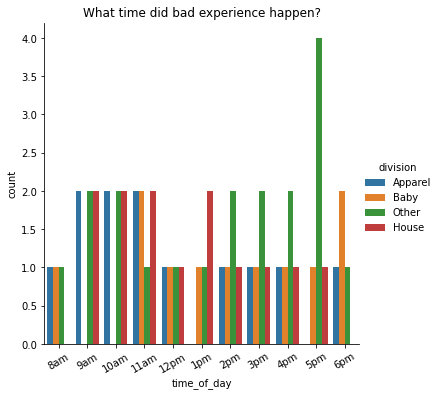

In [129]:
#plt.title('Number of comments and their category for bad customer experience ')
sns.catplot(x='time_of_day',kind='count',hue="division",data=df_worse_experience,order=time_order).set(title='What time did bad experience happen?')
plt.xticks(rotation='30')
plt.show()

###  -------- Who said pricing is worse and in which division ?--------- ###

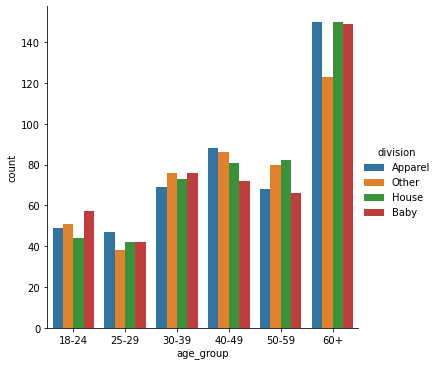

In [97]:
worse_price=df_cleaned[df_cleaned.price=='Worse']
sns.catplot(x='age_group',data=worse_price,hue='division',kind='count',order=age_order)

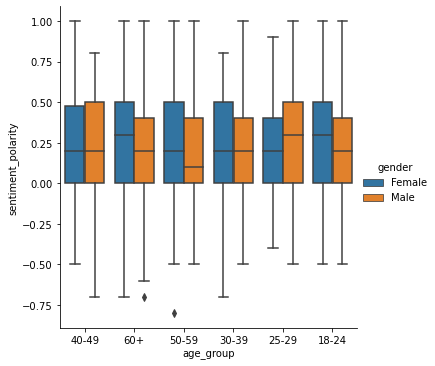

In [119]:
#relationship between age and sentiment polarity
#df_cleaned.total_spend.astype(float)
sns.catplot(x='age_group',y='sentiment_polarity',hue='gender',data=df_cleaned,kind='box')

### Let's find those negative comments from customer having bad experience ###

In [136]:
pd.set_option("display.max_colwidth", None)
df_worse_experience[df_worse_experience.sentiment_polarity<-0.0]['comment']

30      I went to buy my daughter knickers and there was only 1 packet in her size from the whole range of 10 or 4 packs, and it was open so my only option was to buy it anyway, she is size 4-6. Then when I went to buy my knickers there were no size 10 high cut in multi packs with at least 200 other packs there, none in my size, this was very disappointing.
69                                                                                                                                                                                Found it very difficult to locate some products, was disappointed with the selection available and limited sizes, and found some things much more expensive than available elsewhere.
274                                                                                                                                                                                                                                                                                     